In [9]:
# In SIC/notebooks/evaluation.ipynb

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path

In [10]:
# --- Constants ---
BATCH_SIZE = 32

# --- Paths ---
test_dir = Path("../data/seg_test/seg_test")
resnet_model_path = Path("../models/weights/transfer_learning_resnet50.h5")
custom_model_path = Path("../models/weights/custom_cnn.keras")

In [12]:
# --- Evaluation Function ---
def evaluate_and_report(model_path, model_name, img_size):
    print(f"\n🔹 Evaluating {model_name} ...")

    # Load model
    model = tf.keras.models.load_model(model_path)

    # Create test generator
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        shuffle=False
    )

    class_names = list(test_generator.class_indices.keys())

In [ ]:
 # Evaluate
loss, acc = model.evaluate(test_generator, verbose=1)
print(f"{model_name} - Test Accuracy: {acc*100:.2f}%, Loss: {loss:.4f}")

    # Predictions
predictions = model.predict(test_generator, verbose=1)
predicted_class_indices = np.argmax(predictions, axis=1)
true_class_indices = test_generator.classes

Class mapping: {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}


In [7]:
# --- CELL 2: Utility Function to Evaluate a Model ---
def evaluate_and_report(model_path, model_name="Model"):
    print(f"\n🔹 Loading {model_name} from: {model_path}")
    model = tf.keras.models.load_model(model_path)

    # Evaluate on test set
    loss, acc = model.evaluate(test_generator, verbose=1)
    print(f"{model_name} - Test Accuracy: {acc*100:.2f}%, Loss: {loss:.4f}")

    # Predictions
    print(f"\nMaking predictions with {model_name}...")
    predictions = model.predict(test_generator, verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes

    # Confusion Matrix
    print("\nGenerating Confusion Matrix...")
    cm = confusion_matrix(true_classes, predicted_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    plt.show()

    # Classification Report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(true_classes, predicted_classes, target_names=class_names))



In [8]:
# --- CELL 3: Evaluate Both Models ---
evaluate_and_report(resnet_model_path, "Transfer Learning (ResNet50)")
evaluate_and_report(custom_model_path, "Custom CNN")


🔹 Loading Transfer Learning (ResNet50) from: ..\models\weights\transfer_learning_resnet50.h5


c:\Users\hp\assignment\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 150, 150, 3)


🔹 Evaluating Transfer Learning (ResNet50) ...


Found 3000 images belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.1527 - loss: 1.9545
Transfer Learning (ResNet50) - Test Accuracy: 15.27%, Loss: 1.9545
94/94 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step


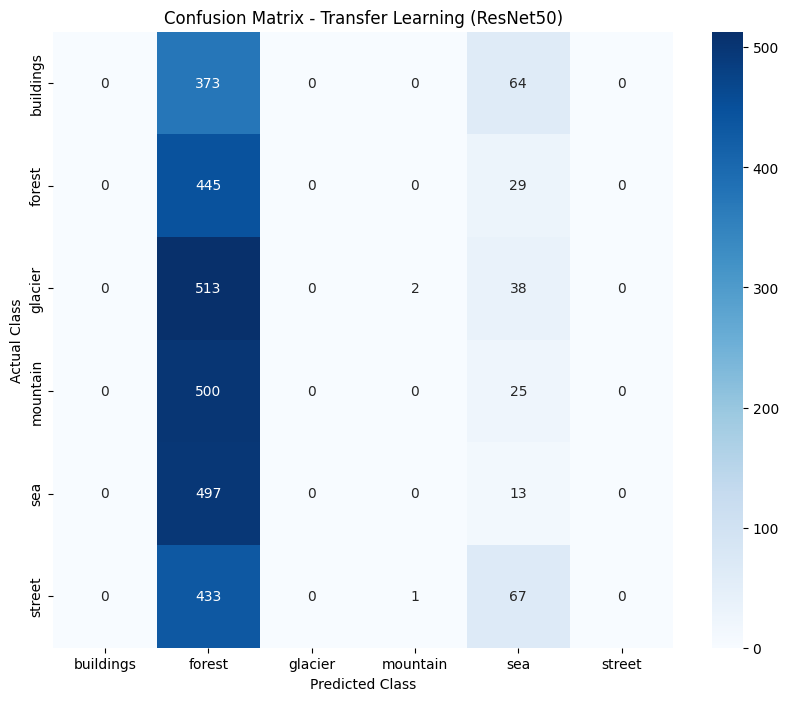


Classification Report - Transfer Learning (ResNet50):

              precision    recall  f1-score   support

   buildings       0.00      0.00      0.00       437
      forest       0.16      0.94      0.28       474
     glacier       0.00      0.00      0.00       553
    mountain       0.00      0.00      0.00       525
         sea       0.06      0.03      0.03       510
      street       0.00      0.00      0.00       501

    accuracy                           0.15      3000
   macro avg       0.04      0.16      0.05      3000
weighted avg       0.03      0.15      0.05      3000


🔹 Evaluating Custom CNN ...


c:\Users\hp\assignment\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\assignment\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hp\assignment\myvenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Found 3000 images belonging to 6 classes.


c:\Users\hp\assignment\myvenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 16s 170ms/step - accuracy: 0.8127 - loss: 0.5690
Custom CNN - Test Accuracy: 81.27%, Loss: 0.5690
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step


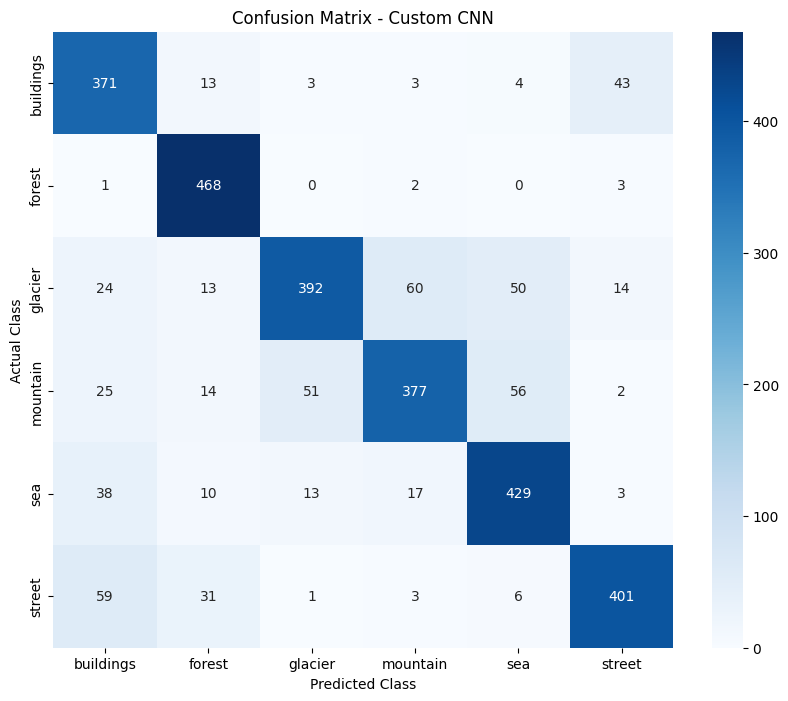


Classification Report - Custom CNN:

              precision    recall  f1-score   support

   buildings       0.72      0.85      0.78       437
      forest       0.85      0.99      0.91       474
     glacier       0.85      0.71      0.77       553
    mountain       0.82      0.72      0.76       525
         sea       0.79      0.84      0.81       510
      street       0.86      0.80      0.83       501

    accuracy                           0.81      3000
   macro avg       0.81      0.82      0.81      3000
weighted avg       0.82      0.81      0.81      3000



In [ ]:
# --- Imports ---
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from pathlib import Path

# --- Paths ---
test_dir = Path("../data/seg_test/seg_test")
resnet_model_path = Path("../models/weights/transfer_learning_resnet50.h5")
cnn_model_path = Path("../models/weights/custom_cnn.keras")

# --- Constants ---
IMG_SIZE_RESNET = (224, 224)   # ResNet50 requires 224x224
IMG_SIZE_CNN = (150, 150)      # Your CNN was trained on 150x150
BATCH_SIZE = 32


# ============== 1. Function to Evaluate Models ==============
def evaluate_model(model, test_generator, model_name):
    """Evaluates a trained model and prints classification report + confusion matrix."""
    print(f"\n🔍 Evaluating {model_name}...\n")

    # Predict
    predictions = model.predict(test_generator, verbose=1)
    y_pred = np.argmax(predictions, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Classification Report
    print(f"Classification Report - {model_name}:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


# ============== 2. ResNet50 Evaluation ==============
print(f"Loading ResNet50 model from {resnet_model_path}")
resnet_model = tf.keras.models.load_model(resnet_model_path)

# Preprocessing for ResNet50
resnet_preprocess = tf.keras.applications.resnet50.preprocess_input

resnet_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=resnet_preprocess
)

resnet_test_generator = resnet_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE_RESNET,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

evaluate_model(resnet_model, resnet_test_generator, "Transfer Learning (ResNet50)")


# ============== 3. Custom CNN Evaluation ==============
print(f"Loading Custom CNN model from {cnn_model_path}")
cnn_model = tf.keras.models.load_model(cnn_model_path)

cnn_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

cnn_test_generator = cnn_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE_CNN,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

evaluate_model(cnn_model, cnn_test_generator, "Custom CNN")
